In [1]:
import copy
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [2]:
gold_df = pd.read_csv('input\LBMA-GOLD.csv')
gold_df

,Date,USD (PM)
0,9/12/16,1324.60
1,9/13/16,1323.65
2,9/14/16,1321.75
3,9/15/16,1310.80
4,9/16/16,1308.35
...,...,...
1260,9/6/21,1821.60
1261,9/7/21,1802.15
1262,9/8/21,1786.00
1263,9/9/21,1788.25


In [3]:
gold_df

,Date,USD (PM)
0,9/12/16,1324.60
1,9/13/16,1323.65
2,9/14/16,1321.75
3,9/15/16,1310.80
4,9/16/16,1308.35
...,...,...
1260,9/6/21,1821.60
1261,9/7/21,1802.15
1262,9/8/21,1786.00
1263,9/9/21,1788.25


In [4]:
org_date = copy.deepcopy(gold_df['Date'].values)

In [5]:
gold_df['Date'] = pd.to_numeric(pd.to_datetime(gold_df['Date'])).values
gold_df['Date'] /= min([gold_df['Date'][i+1] - gold_df['Date'][i] for i in range(len(gold_df['Date']) - 1)])
gold_df['Date'] -= min(gold_df['Date'])
gold_df['Date'] = gold_df['Date'].astype(int)

In [6]:
tf_date = copy.deepcopy(gold_df['Date'].values)

In [7]:
del_list = [gold_df['Date'][i+1] - gold_df['Date'][i] for i in range(len(gold_df['Date']) - 1)]
set(del_list)

{1, 2, 3, 4, 5}

In [8]:
gold_df

,Date,USD (PM)
0,0,1324.60
1,1,1323.65
2,2,1321.75
3,3,1310.80
4,4,1308.35
...,...,...
1260,1820,1821.60
1261,1821,1802.15
1262,1822,1786.00
1263,1823,1788.25


In [9]:
nan_arr = gold_df['USD (PM)'].isna()
nan_arr

0       False
1       False
2       False
3       False
4       False
        ...  
1260    False
1261    False
1262    False
1263    False
1264    False
Name: USD (PM), Length: 1265, dtype: bool

In [10]:
gold_df[~nan_arr]['Date'].values

array([   0,    1,    2, ..., 1822, 1823, 1824])

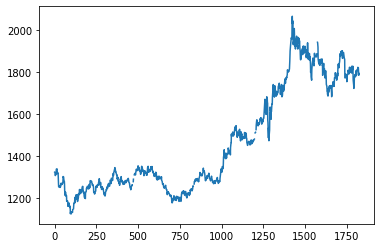

In [11]:
plt.plot(gold_df['Date'], gold_df['USD (PM)'])
plt.show()

In [12]:
non_nan_df = gold_df[~nan_arr]
cs = CubicSpline(non_nan_df['Date'], non_nan_df['USD (PM)'])
gold_df['USD (PM)'] = cs(gold_df['Date'].values)

In [13]:
np.array(gold_df[gold_df['USD (PM)'].isna()].index)

array([], dtype=int64)

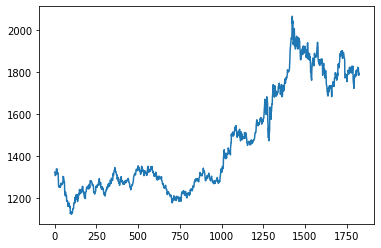

In [14]:
plt.plot(gold_df['Date'], gold_df['USD (PM)'])
plt.show()

In [15]:
org_date

array(['9/12/16', '9/13/16', '9/14/16', ..., '9/8/21', '9/9/21',
       '9/10/21'], dtype=object)

In [16]:
tf_date

array([   0,    1,    2, ..., 1822, 1823, 1824])

In [17]:
gold_dic = {tf_date[i]: (gold_df['USD (PM)'][i], org_date[i]) for i in range(len(org_date))}
np.save('input\Gold dic.npy', gold_dic)

In [18]:
gold_df.to_csv('input\Gold Price.csv')

In [19]:
bit_df = pd.read_csv('input\BCHAIN-MKPRU.csv')

In [20]:
bit_df

,Date,Value
0,9/11/16,621.65
1,9/12/16,609.67
2,9/13/16,610.92
3,9/14/16,608.82
4,9/15/16,610.38
...,...,...
1821,9/6/21,51769.06
1822,9/7/21,52677.40
1823,9/8/21,46809.17
1824,9/9/21,46078.38


In [21]:
org_date = copy.deepcopy(bit_df['Date'].values)

In [22]:
bit_df['Date'] = pd.to_numeric(pd.to_datetime(bit_df['Date'])).values
bit_df['Date'] /= min([bit_df['Date'][i+1] - bit_df['Date'][i] for i in range(len(bit_df['Date']) - 1)])
bit_df['Date'] -= min(bit_df['Date'])
bit_df['Date'] = bit_df['Date'].astype(int)

In [23]:
tf_date = copy.deepcopy(bit_df['Date'].values)

In [24]:
set([bit_df['Date'][i+1] - bit_df['Date'][i] for i in range(len(bit_df['Date']) - 1)])

{1}

In [25]:
del_list = [bit_df['Date'][i+1] - bit_df['Date'][i] for i in range(len(bit_df['Date']) - 1)]
set(del_list)

{1}

In [26]:
bit_df

,Date,Value
0,0,621.65
1,1,609.67
2,2,610.92
3,3,608.82
4,4,610.38
...,...,...
1821,1821,51769.06
1822,1822,52677.40
1823,1823,46809.17
1824,1824,46078.38


In [27]:
bit_df['Value'].isna().any()

False

In [28]:
bit_dic = {tf_date[i]: (bit_df['Value'][i], org_date[i]) for i in range(len(org_date))}
np.save('input\Bitcoin dic.npy', bit_dic)

In [29]:
bit_df.to_csv('input\Bitcoin Price.csv')

In [30]:
sh = pd.read_csv('input\SH300.csv')
sh

,datetime,code,open,close,high,low,vol,amount,p_change
0,2021-09-01,300,4804.69,4869.46,4906.40,4763.30,3267211.0,5.688198e+11,1.33
1,2021-08-31,300,4803.09,4805.61,4821.76,4740.75,2351186.0,4.608057e+11,-0.16
2,2021-08-30,300,4847.03,4813.27,4849.16,4787.20,2196357.0,4.771821e+11,-0.29
3,2021-08-27,300,4794.97,4827.04,4863.47,4793.59,1833102.0,3.684214e+11,0.53
4,2021-08-26,300,4892.20,4801.61,4892.20,4798.70,1976173.0,3.689877e+11,-1.97
...,...,...,...,...,...,...,...,...,...
2831,2010-01-11,300,3593.11,3482.05,3594.53,3465.32,899801.0,1.341140e+11,0.06
2832,2010-01-08,300,3456.91,3480.13,3482.08,3426.70,607902.0,9.019096e+10,0.25
2833,2010-01-07,300,3543.16,3471.46,3558.56,3452.77,803500.0,1.204362e+11,-1.98
2834,2010-01-06,300,3558.70,3541.73,3588.83,3541.17,784731.0,1.210460e+11,-0.63


In [31]:
sh['Date'] = pd.to_numeric(pd.to_datetime(sh['datetime'])).values
sh.sort_values(by='Date', inplace=True)
sh['Date'] /= min([sh['Date'][i+1] - sh['Date'][i] for i in range(len(sh['Date']) - 1)]) / 10
sh['Date'] -= min(sh['Date'])
sh['Date'] = sh['Date'].astype(int)

In [32]:
sh['Date'] = max(sh['Date']) - sh['Date']

In [33]:
sh

,datetime,code,open,close,high,low,vol,amount,p_change,Date
2835,2010-01-05,300,3545.19,3564.04,3577.53,3497.66,858096.0,1.283024e+11,0.81,0
2834,2010-01-06,300,3558.70,3541.73,3588.83,3541.17,784731.0,1.210460e+11,-0.63,0
2833,2010-01-07,300,3543.16,3471.46,3558.56,3452.77,803500.0,1.204362e+11,-1.98,1
2832,2010-01-08,300,3456.91,3480.13,3482.08,3426.70,607902.0,9.019096e+10,0.25,2
2831,2010-01-11,300,3593.11,3482.05,3594.53,3465.32,899801.0,1.341140e+11,0.06,5
...,...,...,...,...,...,...,...,...,...,...
4,2021-08-26,300,4892.20,4801.61,4892.20,4798.70,1976173.0,3.689877e+11,-1.97,3864
3,2021-08-27,300,4794.97,4827.04,4863.47,4793.59,1833102.0,3.684214e+11,0.53,3865
2,2021-08-30,300,4847.03,4813.27,4849.16,4787.20,2196357.0,4.771821e+11,-0.29,3868
1,2021-08-31,300,4803.09,4805.61,4821.76,4740.75,2351186.0,4.608057e+11,-0.16,3869


In [34]:
sh.drop(columns='datetime', inplace=True)
sh['Price'] = sh['high']
sh.drop(columns='high', inplace=True)
sh.reset_index(drop=True)

,code,open,close,low,vol,amount,p_change,Date,Price
0,300,3545.19,3564.04,3497.66,858096.0,1.283024e+11,0.81,0,3577.53
1,300,3558.70,3541.73,3541.17,784731.0,1.210460e+11,-0.63,0,3588.83
2,300,3543.16,3471.46,3452.77,803500.0,1.204362e+11,-1.98,1,3558.56
3,300,3456.91,3480.13,3426.70,607902.0,9.019096e+10,0.25,2,3482.08
4,300,3593.11,3482.05,3465.32,899801.0,1.341140e+11,0.06,5,3594.53
...,...,...,...,...,...,...,...,...,...
2831,300,4892.20,4801.61,4798.70,1976173.0,3.689877e+11,-1.97,3864,4892.20
2832,300,4794.97,4827.04,4793.59,1833102.0,3.684214e+11,0.53,3865,4863.47
2833,300,4847.03,4813.27,4787.20,2196357.0,4.771821e+11,-0.29,3868,4849.16
2834,300,4803.09,4805.61,4740.75,2351186.0,4.608057e+11,-0.16,3869,4821.76


In [35]:
sh.to_csv('input\sh.csv')